## Import the Required Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import pybaseball

## Download the Data & Add Year Label & Merge the Tables


In [2]:
data2014 = pybaseball.schedule_and_record(2014, 'TOR')
data2014['Year'] = '2014'

In [3]:
data2015 = pybaseball.schedule_and_record(2015, 'TOR')
data2015['Year'] = '2015'

In [4]:
data2016 = pybaseball.schedule_and_record(2016, 'TOR')
data2016['Year'] = '2016'

In [5]:
data2017 = pybaseball.schedule_and_record(2017, 'TOR')
data2017['Year'] = '2017'

In [6]:
data = pd.concat([data2014, data2015, data2016, data2017], axis=0, join='outer', join_axes=None, ignore_index=True)

## Cleaning the data to work with
- Cleaned the Days so they work as date times. 


#### Potential Future Work
- We may need to clean the playoff games out of the years that TOR made the playoffs, because they will be extra games on the end of the season with 100% capacity. Could bias the accuracy for those seasons. I'm not sure how we find them easily though. 

In [7]:
# Split the Date up
data[['DOW','Cal_Date']] = data['Date'].str.split(',',expand=True)
data[['Blank', 'Month', 'Day', 'Double_Header']] = data['Cal_Date'].str.split('\s', expand=True)

# The whole reason I had to split it up. Python can't cope with single digit day formats. 
data['Day'] = data['Day'].str.zfill(2)

# Compile it all back up and convert to a datetime
data['Date'] = pd.to_datetime((data['Month'] + data['Day'] + data['Year']), format='%b%d%Y')


# Clean up the interim fields I had to make
data = data.drop(['Cal_Date', 'Blank', 'Month', 'Day'], axis=1)

In [49]:
data.to_csv('data.csv')

## Filter the data

In [23]:
home_games = data[data['Home_Away'] == 'Home']
home_games['Capacity'] = 49282

/Users/Margaret/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,...,Save,Time,D/N,Attendance,Streak,Orig. Scheduled,Year,DOW,Double_Header,Capacity
4,2014-04-04,TOR,Home,NYY,L,3.0,7.0,9.0,2-3,4.0,...,None,3:26,N,48197.0,-2,None,2014,Friday,None,49282
5,2014-04-05,TOR,Home,NYY,W,4.0,0.0,9.0,3-3,2.0,...,Santos,2:45,D,45446.0,1,None,2014,Saturday,None,49282
6,2014-04-06,TOR,Home,NYY,L,4.0,6.0,9.0,3-4,3.0,...,Robertson,2:57,D,34067.0,-1,None,2014,Sunday,None,49282
7,2014-04-08,TOR,Home,HOU,W,5.0,2.0,9.0,4-4,2.0,...,Santos,2:52,N,13123.0,1,None,2014,Tuesday,None,49282
8,2014-04-09,TOR,Home,HOU,W,7.0,3.0,9.0,5-4,1.0,...,None,3:09,N,13569.0,2,None,2014,Wednesday,None,49282


In [24]:
home_games['% Capacity'] = home_games['Attendance']/home_games['Capacity']

/Users/Margaret/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
home_games.head()

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,...,Time,D/N,Attendance,Streak,Orig. Scheduled,Year,DOW,Double_Header,Capacity,% Capacity
4,2014-04-04,TOR,Home,NYY,L,3.0,7.0,9.0,2-3,4.0,...,3:26,N,48197.0,-2,None,2014,Friday,None,49282,0.977984
5,2014-04-05,TOR,Home,NYY,W,4.0,0.0,9.0,3-3,2.0,...,2:45,D,45446.0,1,None,2014,Saturday,None,49282,0.922162
6,2014-04-06,TOR,Home,NYY,L,4.0,6.0,9.0,3-4,3.0,...,2:57,D,34067.0,-1,None,2014,Sunday,None,49282,0.691267
7,2014-04-08,TOR,Home,HOU,W,5.0,2.0,9.0,4-4,2.0,...,2:52,N,13123.0,1,None,2014,Tuesday,None,49282,0.266284
8,2014-04-09,TOR,Home,HOU,W,7.0,3.0,9.0,5-4,1.0,...,3:09,N,13569.0,2,None,2014,Wednesday,None,49282,0.275334


In [31]:
home_games['Attendance'].mean()

36316.0524691358

In [34]:
home_games.groupby(['DOW']).mean()

,R,RA,Inn,Rank,Attendance,Streak,Capacity,% Capacity
DOW,,,,,,,,
Friday,4.403846,4.750000,9.288462,3.019231,36978.250000,0.019231,49282.0,0.750340
Monday,5.235294,3.941176,9.029412,3.117647,30741.558824,0.823529,49282.0,0.623789
Saturday,5.000000,3.980769,9.057692,3.019231,43263.634615,0.461538,49282.0,0.877879
Sunday,4.961538,4.461538,9.326923,3.038462,43513.673077,0.692308,49282.0,0.882953
Thursday,4.823529,4.058824,9.088235,3.029412,32915.323529,0.941176,49282.0,0.667897
Tuesday,4.580000,4.420000,9.160000,3.160000,31139.080000,0.480000,49282.0,0.631855
Wednesday,5.040000,3.880000,9.020000,3.000000,32196.480000,1.020000,49282.0,0.653311


In [48]:
home_games.groupby(['DOW'])['Year'].count()

DOW
Friday       52
Monday       34
Saturday     52
Sunday       52
Thursday     34
Tuesday      50
Wednesday    50
Name: Year, dtype: int64

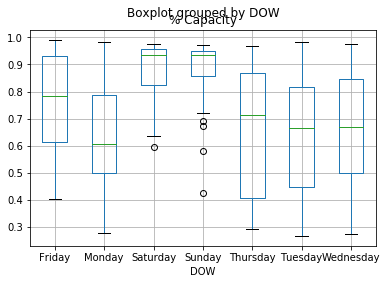

In [46]:
home_games.boxplot('% Capacity','DOW')
plt.show()

In [36]:
home_games.groupby(['Rank']).mean()

,R,RA,Inn,Attendance,Streak,Capacity,% Capacity
Rank,,,,,,,
1.0,5.466667,3.866667,9.050000,37998.600000,1.583333,49282.0,0.771044
2.0,5.044776,3.597015,9.298507,36639.059701,1.179104,49282.0,0.743457
3.0,5.518987,4.164557,9.253165,35157.164557,0.810127,49282.0,0.713388
4.0,3.531250,5.500000,9.031250,31980.500000,-1.031250,49282.0,0.648929
5.0,4.127907,4.593023,9.046512,37568.325581,-0.104651,49282.0,0.762313


In [37]:
home_games.groupby(['Streak']).mean()

,R,RA,Inn,Rank,Attendance,Capacity,% Capacity
Streak,,,,,,,
-7,4.000000,6.000000,9.000000,5.000000,39547.000000,49282,0.802463
-6,1.000000,2.000000,9.000000,5.000000,32957.000000,49282,0.668743
-5,1.500000,4.000000,9.000000,4.500000,29498.500000,49282,0.598565
-4,2.875000,9.375000,9.000000,4.000000,41345.250000,49282,0.838952
-3,2.642857,6.857143,9.142857,3.571429,34185.000000,49282,0.693661
-2,2.939394,5.939394,9.393939,3.393939,36477.878788,49282,0.740187
-1,2.602564,6.256410,9.141026,3.217949,36065.794872,49282,0.731825
1,6.247059,2.505882,9.070588,3.035294,37477.811765,49282,0.760477
2,6.690476,2.380952,9.238095,2.571429,36132.666667,49282,0.733182


In [39]:
home_games.groupby(['Streak'])['% Capacity'].count()

Streak
-7      1
-6      1
-5      2
-4      8
-3     14
-2     33
-1     78
 1     85
 2     42
 3     27
 4     13
 5      7
 6      4
 7      3
 8      2
 9      2
 10     1
 11     1
Name: % Capacity, dtype: int64

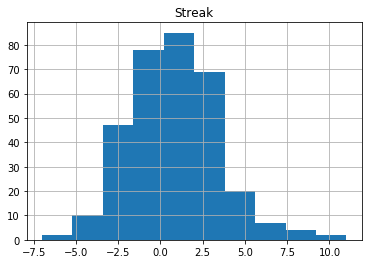

In [41]:
home_games.hist('Streak')
plt.show()

## Explore the Data

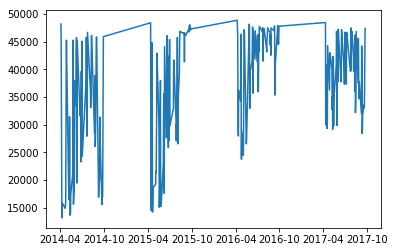

In [9]:
plt.plot(home_games['Date'], home_games['Attendance'])
plt.show()

# Some thoughts on things to look at - MAK
- The percent capacity of home games vs away games
    - this would mean porting in the capacity of the all of the statiums, mapping them to the teams to get the percent capcity
    - This would be interesting because we could then look at the East vs West? 

- Capacity over the year? 
    - 2014 vs 2015 vs 2016 vs 2017 percent capacity
    
- Seasonality of the data
    - We would have to bring in days of the week impact
    - Some complexity here because we would have to line up the days of the week, and we would have to line up the home opener/play offs and I'm not sure how we do that effectively. 